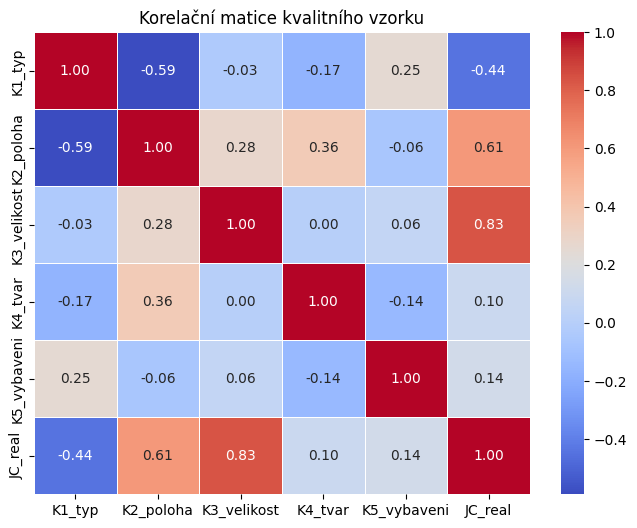

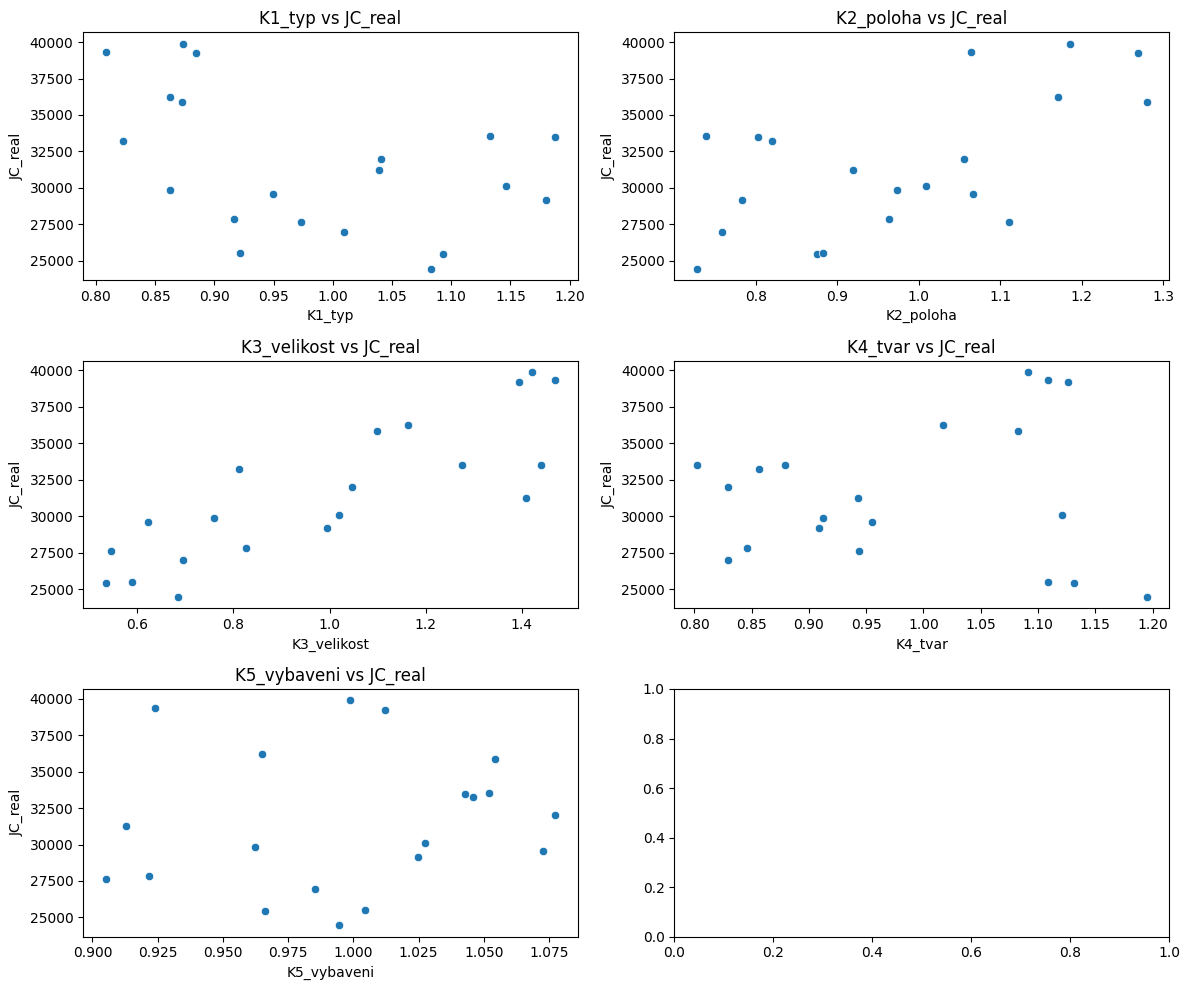

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Generování kvalitního vzorku dat
np.random.seed(42)
n = 20  # počet pozemků

# Simulace vysvětlujících proměnných (kritérií K1-K5)
K1_typ = np.random.uniform(0.8, 1.2, n)
K2_poloha = np.random.uniform(0.7, 1.3, n)
K3_velikost = np.random.uniform(0.5, 1.5, n)  # Normalizovaná velikost
K4_tvar = np.random.uniform(0.8, 1.2, n)
K5_vybaveni = np.random.uniform(0.9, 1.1, n)

# Generování jednotkových cen (JC) s určitou variabilitou
b0 = 20000  # základní cena
b1, b2, b3, b4, b5 = -5000, 8000, 10000, -4000, 3000  # vliv jednotlivých kritérií
noise = np.random.normal(0, 2000, n)  # náhodná chyba

JC_real = (b0 +
           b1 * K1_typ +
           b2 * K2_poloha +
           b3 * K3_velikost +
           b4 * K4_tvar +
           b5 * K5_vybaveni +
           noise)

# Vytvoření DataFrame
df = pd.DataFrame({
    "K1_typ": K1_typ,
    "K2_poloha": K2_poloha,
    "K3_velikost": K3_velikost,
    "K4_tvar": K4_tvar,
    "K5_vybaveni": K5_vybaveni,
    "JC_real": JC_real
})

# Korelační matice
corr_matrix = df.corr()

# Vykreslení korelační matice
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Korelační matice kvalitního vzorku")
plt.show()

# Scatter ploty každého kritéria vůči jednotkové ceně (JC_real)
fig, axes = plt.subplots(3, 2, figsize=(12, 10))

criteria = ["K1_typ", "K2_poloha", "K3_velikost", "K4_tvar", "K5_vybaveni"]
for i, ax in enumerate(axes.flat):
    if i < len(criteria):
        sns.scatterplot(x=df[criteria[i]], y=df["JC_real"], ax=ax)
        ax.set_title(f"{criteria[i]} vs JC_real")
        ax.set_xlabel(criteria[i])
        ax.set_ylabel("JC_real")

plt.tight_layout()
plt.show()


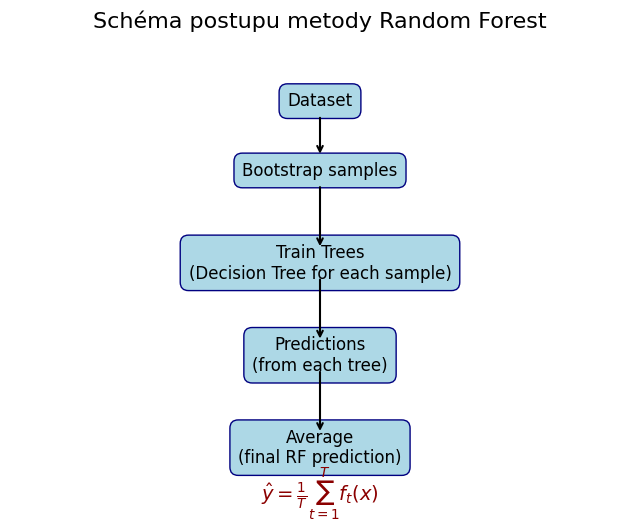

In [1]:
# Random Forest

import matplotlib.pyplot as plt

# Create flowchart diagram for Random Forest
fig, ax = plt.subplots(figsize=(8, 6))
ax.axis('off')

# Define boxes positions and sizes
boxes = {
    "Dataset": (0.5, 0.9),
    "Bootstrap samples": (0.5, 0.75),
    "Train Trees\n(Decision Tree for each sample)": (0.5, 0.55),
    "Predictions\n(from each tree)": (0.5, 0.35),
    "Average\n(final RF prediction)": (0.5, 0.15)
}

# Draw boxes and text
for text, (x, y) in boxes.items():
    ax.annotate(text, xy=(x, y), xytext=(0, 0), textcoords='offset points',
                ha='center', va='center', fontsize=12,
                bbox=dict(boxstyle="round,pad=0.5", fc="lightblue", ec="navy"))

# Draw arrows
arrow_params = dict(arrowstyle="->", color='black', lw=1.5)
ys = list(boxes.values())
for i in range(len(ys) - 1):
    start = ys[i]
    end = ys[i + 1]
    ax.annotate("", xy=(end[0], end[1] + 0.03), xytext=(start[0], start[1] - 0.03),
                arrowprops=arrow_params)

# Add simple formula
ax.text(0.5, 0.05, r"$\hat{y} = \frac{1}{T}\sum_{t=1}^T f_t(x)$",
        ha='center', va='center', fontsize=14, color='darkred')

plt.title("Schéma postupu metody Random Forest", fontsize=16, pad=20)
plt.show()
